# Retrieving Data from [Bitinfocharts](https://bitinfocharts.com) and Price from Yahoo Finance

- Get data from Bitinfocharts
- Extract date and count
- Check for null and na (save them - may need to interpolate missing values)
- Remove null and na variable
- Save dataset

In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
import seaborn as sns
import datetime
sns.set_theme()

#### Getting Tweets between [06/01/2022 - 15/07/2022]

In [25]:
def parse_strlist(sl):
    clean = re.sub("[\[\],\s]","",sl)
    splitted = re.split("[\'\"]",clean)
    values_only = [s for s in splitted if s != '']
    return values_only

In [26]:
url = 'https://bitinfocharts.com/comparison/tweets-btc.html#alltime'
#url = 'https://bitinfocharts.com/comparison/tweets-eth.html#alltime'

In [27]:
response = requests.get(url)

In [28]:
soup = BeautifulSoup(response.text, 'html.parser')

In [29]:
scripts = soup.find_all('script')

In [30]:
for script in scripts:
    if 'd = new Dygraph(document.getElementById("container")' in script.text:
        StrList = script.text
        StrList = '[[' + StrList.split('[[')[-1]
        StrList = StrList.split(']]')[0] +']]'
        StrList = StrList.replace("new Date(", '').replace(')','')
        dataList = parse_strlist(StrList)

date = []
tweet = []
for each in dataList:
    if (dataList.index(each) % 2) == 0:
        date.append(each)
    else:
        tweet.append(each)

df = pd.DataFrame(list(zip(date, tweet)), columns=["Date","Bitcoin - Tweets"])

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
i = 0
nulls =[]

In [33]:
i = 0
for each in df['Bitcoin - Tweets']:
    #print(each)
    if each=='null':
        df['Bitcoin - Tweets'][i] = 0
        nulls.append(df.loc[i])
    else:
        df['Bitcoin - Tweets'][i] = int(each)
    i +=1


/var/folders/zm/bf3yd8d526x62v9mglx0hpqw0000gn/T/ipykernel_55810/4274182686.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bitcoin - Tweets'][i] = int(each)
/var/folders/zm/bf3yd8d526x62v9mglx0hpqw0000gn/T/ipykernel_55810/4274182686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bitcoin - Tweets'][i] = 0


In [34]:
nulls = pd.DataFrame(nulls)

In [35]:
df.drop(index=nulls.index, inplace= True)

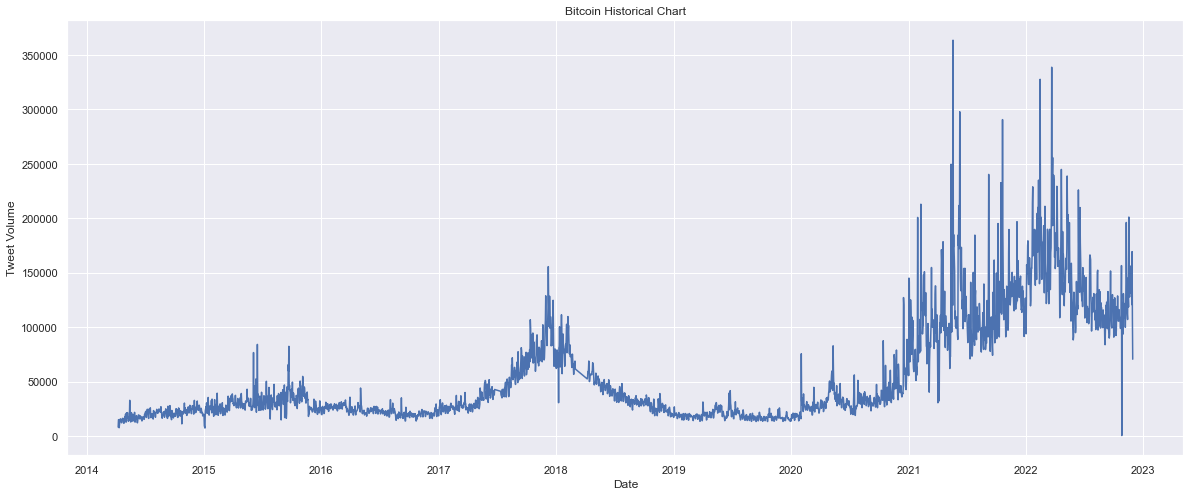

In [36]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(df['Date'],df['Bitcoin - Tweets'])
plt.title("Bitcoin Historical Chart")
plt.xlabel("Date")
plt.ylabel("Tweet Volume")
plt.show()

In [40]:
df.to_excel('Datasets/btc-bitinfocharts.xlsx',engine = 'openpyxl')
#df.to_excel('Datasets/test-bitinfocharts.xlsx')

## Getting Bitcoin Price

In [2]:
import yfinance as yf

In [8]:
BTC_Ticker = yf.Ticker("BTC-USD")
BTC_Data = BTC_Ticker.history(period="max")
BTC_Data.index = BTC_Data.index.tz_localize(None)
BTC_Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-11-29,16217.639648,16522.257812,16139.396484,16444.982422,23581685468,0,0
2022-11-30,16445.476562,17190.937500,16445.476562,17168.566406,29523576583,0,0
2022-12-01,17168.001953,17197.498047,16888.388672,16967.132812,22895392882,0,0


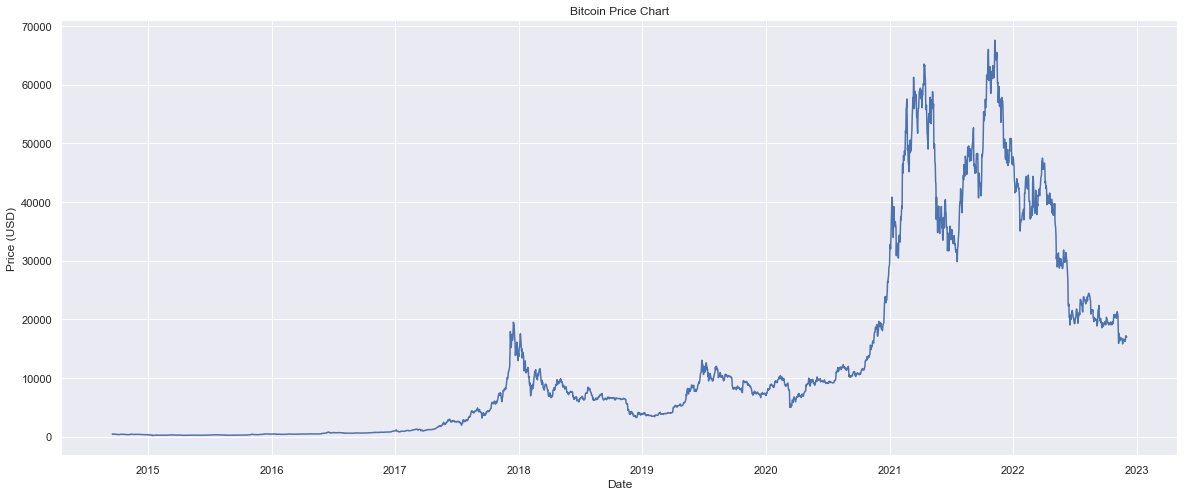

In [9]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(BTC_Data['Close'])
plt.title("Bitcoin Price Chart")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [21]:
BTC_Data['Uptick'] = BTC_Data['Volume'].diff(periods=-1)*(-1)
BTC_Data['Uptick'] = BTC_Data['Uptick'].apply(lambda x: 1 if x > 0 else 0)
BTC_Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Uptick
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0,1
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0,1
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0,0
...,...,...,...,...,...,...,...,...
2022-11-29,16217.639648,16522.257812,16139.396484,16444.982422,23581685468,0,0,1
2022-11-30,16445.476562,17190.937500,16445.476562,17168.566406,29523576583,0,0,0
2022-12-01,17168.001953,17197.498047,16888.388672,16967.132812,22895392882,0,0,0


In [22]:
BTC_Data.to_excel('Datasets/btc_price_volume.xlsx',engine = 'openpyxl')

In [9]:
BTC_Data_long = BTC_Ticker.history(start="2022-06-01", end="2022-07-16",interval= '1h')
BTC_Data_long.index = BTC_Data_long.index.tz_localize(None)
BTC_Data_long['Uptick'] = BTC_Data_long['Volume'].diff(periods=-1)*(-1)
BTC_Data_long['Uptick'] = BTC_Data_long['Uptick'].apply(lambda x: 1 if x > 0 else 0)

BTC_Data_long

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Uptick
2022-06-01 00:00:00,31803.693359,31957.285156,31730.138672,31950.976562,0,0,0,0
2022-06-01 01:00:00,31944.302734,31944.302734,31850.884766,31899.189453,0,0,0,1
2022-06-01 02:00:00,31900.824219,31906.267578,31756.447266,31810.035156,36503552,0,0,0
2022-06-01 03:00:00,31808.027344,31809.072266,31634.646484,31641.478516,0,0,0,1
2022-06-01 04:00:00,31643.916016,31682.437500,31444.685547,31587.060547,489062400,0,0,0
...,...,...,...,...,...,...,...,...
2022-07-15 19:00:00,20996.783203,21114.349609,20953.535156,21114.349609,83296256,0,0,1
2022-07-15 20:00:00,21123.902344,21132.496094,20928.576172,20928.576172,440952832,0,0,0
2022-07-15 21:00:00,20938.443359,20981.906250,20886.013672,20958.728516,122134528,0,0,0
2022-07-15 22:00:00,20964.828125,20964.828125,20852.269531,20892.623047,0,0,0,1


In [10]:
BTC_Data_long.to_excel('Datasets/btc_price_volume_long.xlsx',engine = 'openpyxl')